### **Imports and initialization**

In [21]:
import numpy as np

from TurtleControllers import TurtlebotController
from TurtleVision import TurtlebotVision
from TurtleICP import TurtlebotICP
from TurtleUtils import show_img, plot_data, robot2plt, plot_fitted_garage, plt2robot, transform_points

from robolab_turtlebot import Turtlebot
turtle = Turtlebot(rgb = True, pc = True)
turtle_vision = TurtlebotVision(turtle)
turtle_icp = TurtlebotICP()

#### **Sample garage and fit garage model**

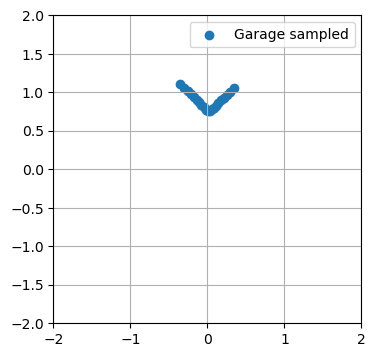

In [22]:
sampled_points = turtle_vision.sample_garage(color = "yellow",
                        sampling_step = 20, r2p = True)
sampled_points_np = np.array(sampled_points).T
plot_data([sampled_points_np], ["Garage sampled"])

In [23]:
print(sampled_points_np.shape)
result = turtle_icp.optimize(sampled_points_np)
result.animate_results()

(2, 21)
Filtered 0 points
[]
Optimizing ... Angle 0
Angle 60
Angle -60
Angle 120
Angle -120
Done
Optimization time: 2.01 s


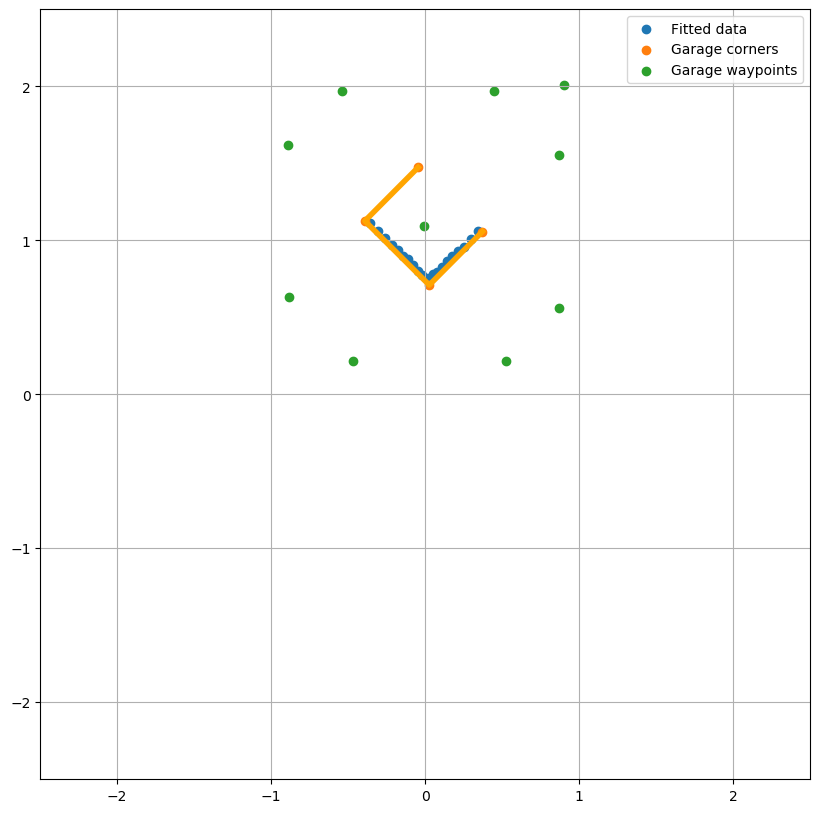

In [24]:
plot_fitted_garage(result.garage, sampled_points_np)

#### **Retrieve garage object**

In [25]:
turtle_controller = TurtlebotController(turtle, rate = 40)
turtle_controller.reset_odometry()

garage = result.garage

pt, idx = garage.closest_waypoint(turtle_controller.get_odometry())
turtle_controller.move_to(pt)
turtle_controller.face_towards(plt2robot([garage.waypoints[:,0]])[0], relative = False)

In [26]:
sampled_points2 = turtle_vision.sample_garage(color = "yellow",
                        sampling_step = 20, r2p = True)
sampled_points2 = transform_points(sampled_points2, *turtle_controller.get_odometry())
sampled_points_np2 = np.array(sampled_points).T

sampled_points_np = np.hstack((sampled_points_np, sampled_points_np2))
print(sampled_points_np.shape)

(2, 42)


/home.nfs/jonjaku1/lar/22_3_2023/lar/folder/TurtleVision.py:48: RuntimeWarning: Mean of empty slice
  column_mean = np.nanmean(depth_image_strip, axis=0)


In [27]:
result = turtle_icp.optimize(sampled_points_np)
result.animate_results()

Filtered 0 points
[]
Optimizing ... Angle 0
Angle 60
Angle -60
Angle 120
Angle -120
Done
Optimization time: 7.00 s


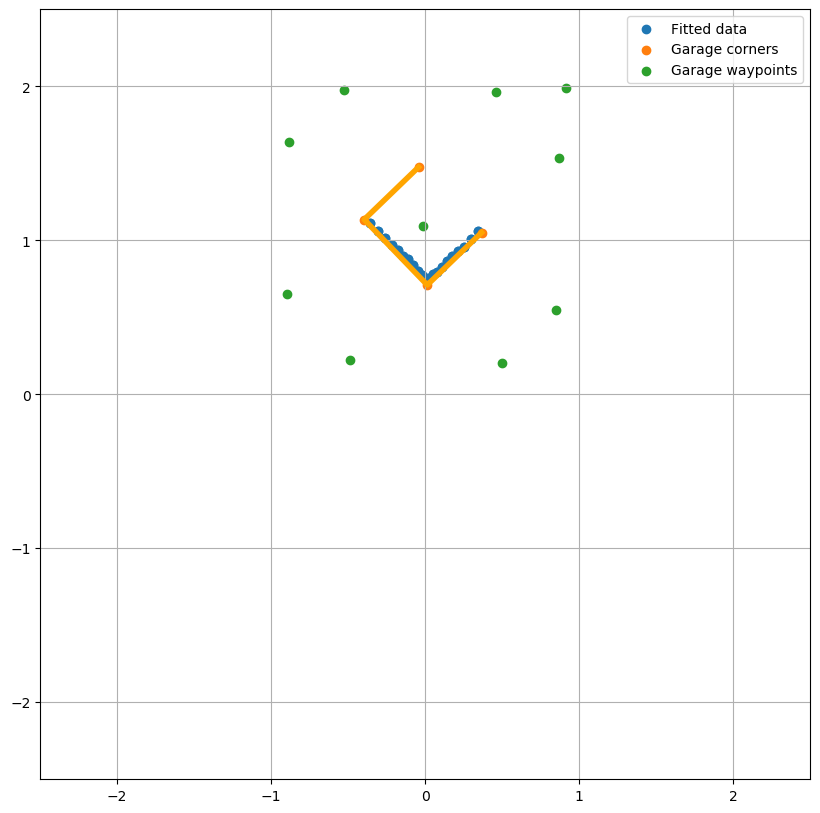

In [28]:
plot_fitted_garage(result.garage, sampled_points_np)

In [29]:
garage = result.garage

pt, idx = garage.closest_waypoint(turtle_controller.get_odometry())
while idx != 1:
    turtle_controller.move_to(pt)
    pt, idx = garage.closest_waypoint(idx)

In [30]:
pt, idx = garage.closest_waypoint(idx)

KeyError: 1

shutdown request: [/turtlenode] Reason: new node registered with same name


In [12]:
idx

1

In [9]:
type(idx)

int

In [11]:
sampled_points_np.shape

(2, 38)